In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import itertools

from tqdm import tqdm_notebook as tqdm

from graph_utils.generate_graph import generate_graph
from graph_utils.utils import pp, miia, mip, mioa, in_neighbors
from graph_utils.greedy_ic import naive_greedy_algorithm

## Initial setup

In [2]:
grph = generate_graph(num_nodes_min_max=[50, 55])

/Users/hugo/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


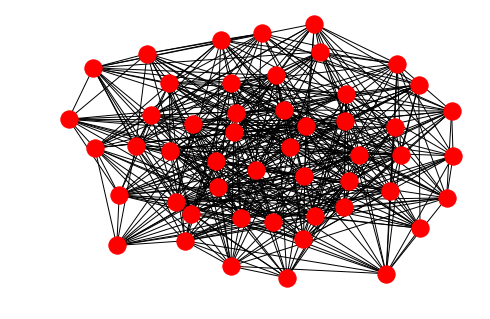

In [3]:
nx.draw(grph)

Text(0.5, 1.0, 'Histogram of transition probabilities')

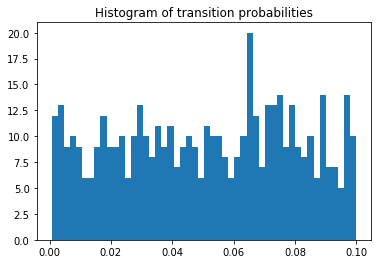

In [4]:
plt.hist([i['transition_proba'] for i in list(grph.edges.values())], bins=50)
plt.title("Histogram of transition probabilities")

Text(0.5, 1.0, 'Histogram of -log-transition probabilities')

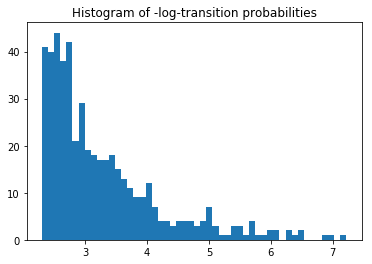

In [5]:
plt.hist([i['log_transition_proba'] for i in list(grph.edges.values())], bins=50)
plt.title("Histogram of -log-transition probabilities")

In [6]:
s = naive_greedy_algorithm(3, grph, tqdm)

In [7]:
s

[0, 1, 3]

In [ ]:
nx.draw_networkx(grph, node_color=[(10 if i in s else 9) for i in grph.nodes])

In [11]:

def hsh(i, lst):
    return int( str(hash(repr(lst))) + str(hash(i)))
    
def ap(u, S, miia_v_theta, grph, cache):
    """ Compute activation probability of node 
    u, from set S and maximum influence in-arboresence
    miia_v_theta.
    """
    n_in = in_neighbors(u, miia_v_theta)
    if u in S:
        return 1.
    elif not len(n_in):
        return 0.
    else:
        base = 1
        for in_neighbor in n_in:
            if hsh(in_neighbor, miia_v_theta) in cache:
                p = cache[hsh(in_neighbor, miia_v_theta)]
            else:
                p =  ap(in_neighbor, S, miia_v_theta, grph, cache)
                cache[hsh(in_neighbor, miia_v_theta)] = p
            base *= (1 - p*pp(in_neighbor, u, grph))
        return 1 - base

In [15]:
sd = {}

In [18]:
for i in range(50):
    ap(i, [1], miia(i, 0.001, grph), grph, sd)

In [41]:
S = [2]
cache = {}
children = {}
tree = sorted(miia(0, 0.001, grph), key=lambda x: -len(x))
for path in tree:

    for i in range(1, len(path)):
        if path[i] in children:
            children[path[i]].append(path[i-1])
        else:
            children[path[i]] = [path[i-1]]
    
    if not path[0] in cache: 
        cache[path[0]] = 1 if path[0] in S else 0
        path.pop(0)

In [42]:
tree

[[4, 0],
 [11, 0],
 [3, 0],
 [3, 0],
 [21, 0],
 [11, 0],
 [6, 0],
 [2, 0],
 [3, 0],
 [16, 0],
 [3, 0],
 [19, 0],
 [2, 0],
 [3, 0],
 [2, 0],
 [13, 0],
 [3, 0],
 [4, 0],
 [2, 0],
 [2, 0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0]]

In [38]:
cache

{1: 0,
 5: 0,
 7: 0,
 8: 0,
 9: 0,
 12: 0,
 15: 0,
 17: 0,
 18: 0,
 25: 0,
 31: 0,
 33: 0,
 34: 0,
 35: 0,
 38: 0,
 39: 0,
 41: 0,
 44: 0,
 46: 0,
 49: 0,
 2: 1,
 3: 0,
 4: 0,
 6: 0,
 11: 0,
 13: 0,
 14: 0,
 16: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 26: 0,
 27: 0,
 28: 0,
 32: 0,
 36: 0,
 37: 0,
 43: 0,
 45: 0,
 48: 0}

In [39]:
children

{4: [1, 44],
 0: [4,
  11,
  3,
  3,
  21,
  11,
  6,
  2,
  3,
  16,
  3,
  19,
  2,
  3,
  2,
  13,
  3,
  4,
  2,
  2,
  2,
  3,
  4,
  6,
  11,
  13,
  14,
  16,
  19,
  20,
  21,
  22,
  23,
  24,
  26,
  27,
  28,
  32,
  36,
  37,
  43,
  45,
  48],
 11: [5, 12],
 3: [7, 8, 18, 31, 35, 41],
 21: [9],
 6: [15],
 2: [17, 34, 38, 46, 49],
 16: [25],
 19: [33],
 13: [39]}

In [40]:
cache

{1: 0,
 5: 0,
 7: 0,
 8: 0,
 9: 0,
 12: 0,
 15: 0,
 17: 0,
 18: 0,
 25: 0,
 31: 0,
 33: 0,
 34: 0,
 35: 0,
 38: 0,
 39: 0,
 41: 0,
 44: 0,
 46: 0,
 49: 0,
 2: 1,
 3: 0,
 4: 0,
 6: 0,
 11: 0,
 13: 0,
 14: 0,
 16: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 26: 0,
 27: 0,
 28: 0,
 32: 0,
 36: 0,
 37: 0,
 43: 0,
 45: 0,
 48: 0}